# Afrobeats Exploratory Data Analysis using Python - A Case Study


### Introduction

**Afrobeats genre of music have taken over the world, with its unique style of music, beats, rhythm, lyrics etc. Our artists have sold our event centres, arenas, staduim with ease across the globe. Artists such as Wizkid, Davido, Burna boy, Rema, Tems, Asake are globally recognised.**

**Music videos are short film clips where artists promote and showcase their talents, craft and artistic prowess to the world. Most of these artists use video platforms such as youtube to promote their music for the world to see.**

**In this project, we'll use the youtube platform to get data of some top afrobeats artists. We'll extract information such as, channel names, views, number of videos etc, and analyse them. In no particular order, they are:**

- **Wizkid**
- **Davido**
- **Burna Boy**
- **Tiwa Savage**
- **Yemi Alade**
- **Tems**
- **Rema**
- **Olamide**
- **Asake**
- **Ayra Starr**

**Here are steps to extract data from youtube:**
- **Create a project on [google developer console](https://console.cloud.google.com/cloud-resource-manager)**
- **Enable YouTube API for [YouTube Data APi v3](https://console.cloud.google.com/apis/library)**
- **Create an [API key](https://console.cloud.google.com/apis/credentials)**
- **Google [YouTube Data API Documentation](https://developers.google.com/youtube/v3/docs)**

**We'll also use the following python libraries for this project, they are:**
- **googleapiclient**
- **Pandas**
- **Seaborn**
- **matplotlib**
- **json**

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

**For satefy reasons, we'll save our `api_key` in file called `credentials.json` and access it using the keyword `api_key`.**

In [14]:
import json
try:
    with open('crendentials.json') as file:
        credentials = json.load(file)
except FileNotFound:
    print("Error: credentials.json file not found.")

**We'll get some of our favourite afrobeats artise's youtube channel id's, you can learn [How to Find YouTube Channel ID for ANY YouTube Channel](https://www.youtube.com/watch?v=0oDy2sWPF38) here**.

**Next, we'll build a YouTube service with the parameters provided by YouTube documentation.**

In [15]:
api_key = credentials['api_key']
channel_ids = ['UCi7Cbr-F3zFQjwafFh5RWJA', # Wizkid
               'UCkBV3nBa0iRdxEGc4DUS3xA', # Davido
               'UCEzDdNqNkT-7rSfSGSr1hWg', # Burnaboy
               'UCp87taDLDbvqPyoyhBZ7jWQ', # Olamide
               'UCHGF6zfD2gwLuke95X3CKFQ', # Rema
               'UCcBJoRL_QYkPlJaMhAUahvA', # Tiwa savage
               'UCK7oVw_ftuBIwiipiBf7ogA', # Arya starr
               'UCWD1TnmmbbynUSp8tkadR-g', # Yemi alade
               'UCWfi5ELXGAe-DCA6cOP3aNw', # Tems
               'UCU9R50wyBPKpdbcIScAyZig' # Asake
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

**We will create a function called `get_yt_channel_stats` to get the data we need.**

In [16]:
def get_yt_channel_stats(youtube, channel_ids):
    all_data = []
    
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Date_created = response['items'][i]['snippet']['publishedAt'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'])
        all_data.append(data)
        
    return all_data

In [20]:
youtube_channel_statistics = get_yt_channel_stats(youtube, channel_ids)
youtube_channel_statistics

[{'Channel_name': 'Olamide',
  'Date_created': '2016-12-19T13:05:37Z',
  'Subscribers': '1120000',
  'Views': '434898799',
  'Total_videos': '78'},
 {'Channel_name': 'Tems',
  'Date_created': '2018-07-25T18:18:31Z',
  'Subscribers': '732000',
  'Views': '286079572',
  'Total_videos': '34'},
 {'Channel_name': 'StarBoy TV',
  'Date_created': '2014-09-20T10:31:05Z',
  'Subscribers': '2910000',
  'Views': '1833552384',
  'Total_videos': '64'},
 {'Channel_name': 'ASAKE',
  'Date_created': '2015-12-13T18:16:43Z',
  'Subscribers': '956000',
  'Views': '398985145',
  'Total_videos': '64'},
 {'Channel_name': 'Rema',
  'Date_created': '2019-04-07T10:36:23Z',
  'Subscribers': '3820000',
  'Views': '1395895162',
  'Total_videos': '122'},
 {'Channel_name': 'Davido',
  'Date_created': '2018-11-22T11:37:20Z',
  'Subscribers': '3750000',
  'Views': '1486914907',
  'Total_videos': '66'},
 {'Channel_name': 'Burna Boy',
  'Date_created': '2018-01-12T22:21:21Z',
  'Subscribers': '4450000',
  'Views': '247

**We'll load our data into pandas data frame.**

In [21]:
afrobeats_data = pd.DataFrame(youtube_channel_statistics)

In [22]:
afrobeats_data

,Channel_name,Date_created,Subscribers,Views,Total_videos
0,Olamide,2016-12-19T13:05:37Z,1120000,434898799,78
1,Tems,2018-07-25T18:18:31Z,732000,286079572,34
2,StarBoy TV,2014-09-20T10:31:05Z,2910000,1833552384,64
3,ASAKE,2015-12-13T18:16:43Z,956000,398985145,64
4,Rema,2019-04-07T10:36:23Z,3820000,1395895162,122
5,Davido,2018-11-22T11:37:20Z,3750000,1486914907,66
6,Burna Boy,2018-01-12T22:21:21Z,4450000,2472192130,250
7,Yemi Alade,2012-11-15T07:41:35Z,2290000,742939065,247
8,Tiwa Savage,2016-09-08T09:30:53Z,1350000,489974586,98
9,Ayra Starr,2021-01-14T19:20:40.406323Z,1500000,451726660,33


## Data Preparation and Cleaning

**Let's view some basic information about the `afrobeats` data frame. By doing, we'll identify where to clean and therefore prepare our data for analysis and visualization.**

In [23]:
afrobeats_data.shape

(10, 5)

**The data frame contains ten rows and five columns.**

In [28]:
afrobeats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  10 non-null     object
 1   Date_created  10 non-null     object
 2   Subscribers   10 non-null     object
 3   Views         10 non-null     object
 4   Total_videos  10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


**The data type of all the columns is `object` which is not totally true because some of the columns ought to be numeric columns such as `Subscribers`, `Views` and `Total_videos`.**

**Also, the `Date_created` column should be in a humanly readable form.**

In [29]:
afrobeats_data['Date_created'] = pd.to_datetime(afrobeats_data['Date_created']).dt.date
afrobeats_data['Subscribers'] = pd.to_numeric(afrobeats_data['Subscribers'])
afrobeats_data['Views'] = pd.to_numeric(afrobeats_data['Views'])
afrobeats_data['Total_videos'] = pd.to_numeric(afrobeats_data['Total_videos'])

**Let's inspect the data frame to see if the changes where effect properly.**

In [30]:
afrobeats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  10 non-null     object
 1   Date_created  10 non-null     object
 2   Subscribers   10 non-null     int64 
 3   Views         10 non-null     int64 
 4   Total_videos  10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


In [31]:
afrobeats_data

,Channel_name,Date_created,Subscribers,Views,Total_videos
0,Olamide,2016-12-19,1120000,434898799,78
1,Tems,2018-07-25,732000,286079572,34
2,StarBoy TV,2014-09-20,2910000,1833552384,64
3,ASAKE,2015-12-13,956000,398985145,64
4,Rema,2019-04-07,3820000,1395895162,122
5,Davido,2018-11-22,3750000,1486914907,66
6,Burna Boy,2018-01-12,4450000,2472192130,250
7,Yemi Alade,2012-11-15,2290000,742939065,247
8,Tiwa Savage,2016-09-08,1350000,489974586,98
9,Ayra Starr,2021-01-14,1500000,451726660,33


**We can see that the data frame have two `object` and three `int64` data types, the `Date_created` column is also now in a much better readable format but not yet in its proper data type. We should work it again.**

In [32]:
afrobeats_data['Date_created'] = pd.to_datetime(afrobeats_data['Date_created'])

In [33]:
afrobeats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Channel_name  10 non-null     object        
 1   Date_created  10 non-null     datetime64[ns]
 2   Subscribers   10 non-null     int64         
 3   Views         10 non-null     int64         
 4   Total_videos  10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 528.0+ bytes


**Now we have the `Date_created` column in the datetime64[ns] data type.**

**The data is now cleaned and ready for analysis and visualization, we can optionally write the data to a file for future use.**

In [34]:
afrobeats_data

,Channel_name,Date_created,Subscribers,Views,Total_videos
0,Olamide,2016-12-19,1120000,434898799,78
1,Tems,2018-07-25,732000,286079572,34
2,StarBoy TV,2014-09-20,2910000,1833552384,64
3,ASAKE,2015-12-13,956000,398985145,64
4,Rema,2019-04-07,3820000,1395895162,122
5,Davido,2018-11-22,3750000,1486914907,66
6,Burna Boy,2018-01-12,4450000,2472192130,250
7,Yemi Alade,2012-11-15,2290000,742939065,247
8,Tiwa Savage,2016-09-08,1350000,489974586,98
9,Ayra Starr,2021-01-14,1500000,451726660,33


In [35]:
afrobeats_data.to_csv('Afrobeats_Artists_YouTube.csv', index=None)

## Exploratory Analysis and Visualization

**We'll perform exploratory analysis by exploring the columns in the data frame to uderstand the data before we ask and answer questions.**

**Let's import `matplotlib.pyplot` and set our `seaborn` so as to produce great visualizations.**

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Subscribers

**Let's look at the `Subscribers` to know the afrobeats artist with the highest number of subscribers.**

In [37]:
subscriber_df = afrobeats_data[['Channel_name', 'Subscribers']].sort_values(by='Subscribers', ascending=False)
subscriber_df

,Channel_name,Subscribers
6,Burna Boy,4450000
4,Rema,3820000
5,Davido,3750000
2,StarBoy TV,2910000
7,Yemi Alade,2290000
9,Ayra Starr,1500000
8,Tiwa Savage,1350000
0,Olamide,1120000
3,ASAKE,956000
1,Tems,732000


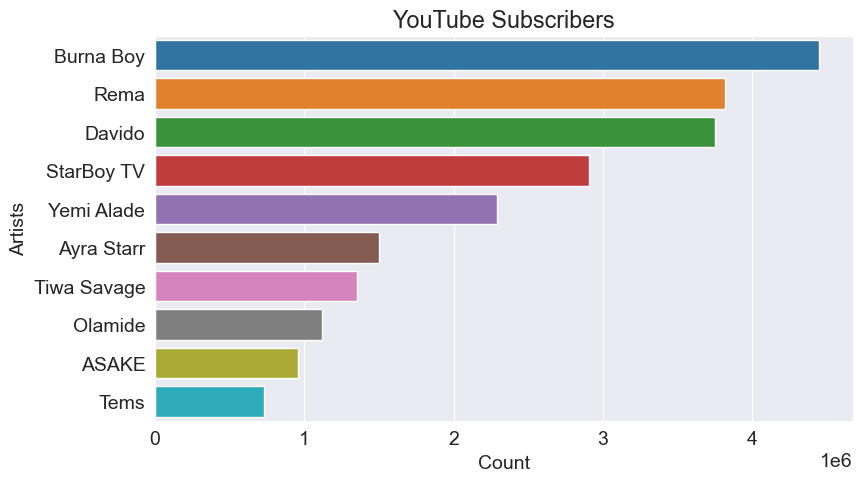

In [38]:
plt.title('YouTube Subscribers')
sns.barplot(x='Subscribers', y='Channel_name', data=subscriber_df)
plt.xlabel('Count')
plt.ylabel('Artists');

**Burna Boy is the afrobeats artist with the highest youtube subscribers with over 4.4 million subsribers. He is followed by Rema with over 3.8 millions subscribers. Davido comes in third with over 3.7 million subscribers.**

### Views

**Let's explore the `Views` column and get some insights about it.**

In [39]:
views_df = afrobeats_data[['Channel_name', 'Views']].sort_values(by='Views', ascending=False)
views_df

,Channel_name,Views
6,Burna Boy,2472192130
2,StarBoy TV,1833552384
5,Davido,1486914907
4,Rema,1395895162
7,Yemi Alade,742939065
8,Tiwa Savage,489974586
9,Ayra Starr,451726660
0,Olamide,434898799
3,ASAKE,398985145
1,Tems,286079572


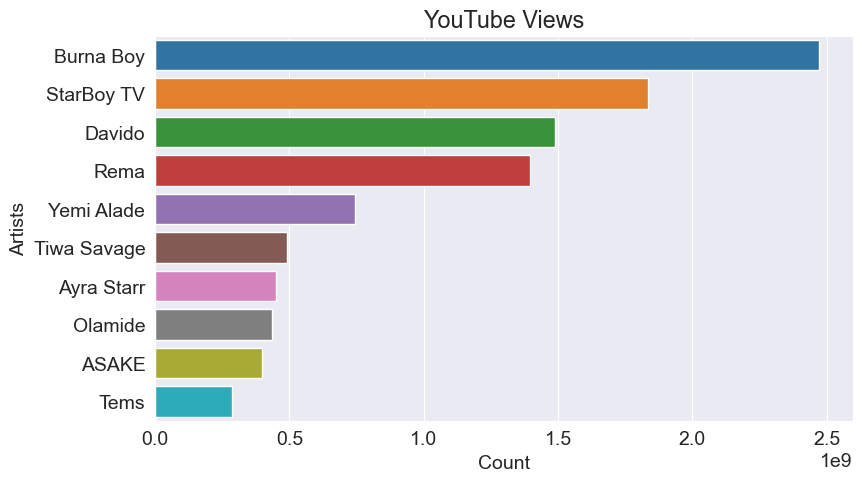

In [40]:
plt.title('YouTube Views')
sns.barplot(x='Views', y='Channel_name', data=views_df)
plt.xlabel('Count')
plt.ylabel('Artists');

**Burna Boy is again the leading artist with over 2.4 billion youtube views. Wizkid (StarBoy Tv) is second with about 1.8 billion views, Davido is coming in third with 1.4 billion youtube views while Rema is in fourth with over 1.3 views on youtube.**

### Videos

**We'll explore the `Videos` column to understand our data better.**

In [41]:
video_df = afrobeats_data[['Channel_name', 'Total_videos']].sort_values(by='Total_videos', ascending=False)
video_df

,Channel_name,Total_videos
6,Burna Boy,250
7,Yemi Alade,247
4,Rema,122
8,Tiwa Savage,98
0,Olamide,78
5,Davido,66
2,StarBoy TV,64
3,ASAKE,64
1,Tems,34
9,Ayra Starr,33


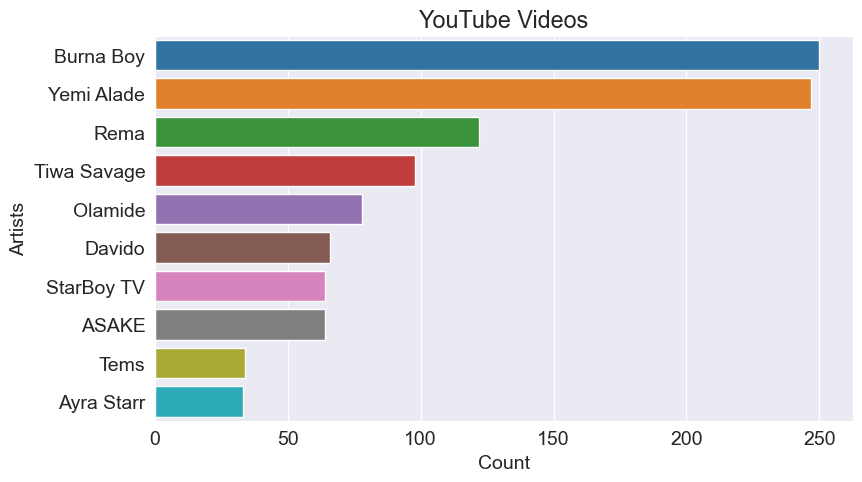

In [42]:
plt.title('YouTube Videos')
sns.barplot(x='Total_videos', y='Channel_name', data=video_df)
plt.xlabel('Count')
plt.ylabel('Artists');

**Burna Boy have the highest number of videos on youtube with 250 videos while Yemi Alade is closely second with 247 videos. Rema is in distant third with 120 videos.**

## Asking and Answering Questions

**The exploration of columns have given us some insights about the `afrobeats` youtube dataset. Let's ask some specific questions and answer them using data frame operations and visualizations.**

#### Q: What is the gender distribution in the dataset?

**To answer this question, we need to create a gender column in our `afrobeats` data frame before we can answer the question.**

In [6]:
# Create a dictionary 'gender'.
gender = {
    'StarBoy TV': 'Male', 'Burna Boy': 'Male', 'Davido': 'Male', 'ASAKE': 'Male', 'Olamide': 'Male', 'Rema': 'Male', 
    'Yemi Alade': 'Female', 'Tiwa Savage': 'Female', 'Tems': 'Female', 'Ayra Starr': 'Female'
}

afrobeats_data['Gender'] = afrobeats_data.Channel_name.map(gender)

In [7]:
afrobeats_data

,Channel_name,Date_created,Subscribers,Views,Total_videos,Gender
0,Olamide,2016-12-19,1120000,434898799,78,Male
1,Tems,2018-07-25,732000,286079572,34,Female
2,StarBoy TV,2014-09-20,2910000,1833552384,64,Male
3,ASAKE,2015-12-13,956000,398985145,64,Male
4,Rema,2019-04-07,3820000,1395895162,122,Male
5,Davido,2018-11-22,3750000,1486914907,66,Male
6,Burna Boy,2018-01-12,4450000,2472192130,250,Male
7,Yemi Alade,2012-11-15,2290000,742939065,247,Female
8,Tiwa Savage,2016-09-08,1350000,489974586,98,Female
9,Ayra Starr,2021-01-14,1500000,451726660,33,Female


In [8]:
gender_counts = afrobeats_data.Gender.value_counts()
gender_counts

Male      6
Female    4
Name: Gender, dtype: int64

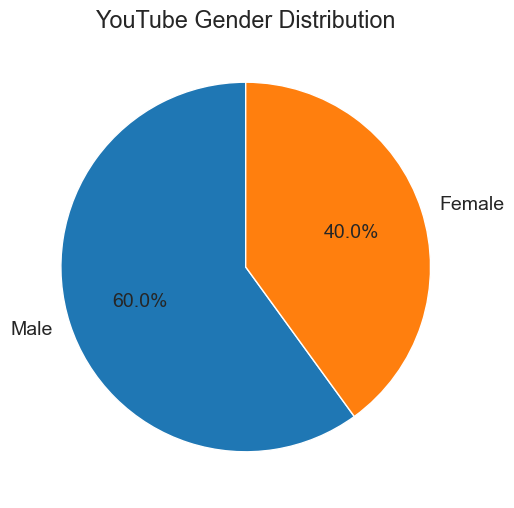

In [9]:
plt.figure(figsize=(12,6))
plt.title('YouTube Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90);

**Male gender is higly represented with 60% while female representation is 40%. This gender representation is somewhat inbalance because the youtube channels were selected with bias.**

### Which artist youtube channel is the oldest?

**We can answer this question by sorting the data by `Date_created` column.**

In [10]:
afrobeats_data['Year_created'] = pd.DatetimeIndex(afrobeats_data.Date_created ).year

In [12]:
oldest_df = afrobeats_data[['Channel_name', 'Year_created']].sort_values(by='Year_created').copy()
oldest_df.head(5)

,Channel_name,Year_created
7,Yemi Alade,2012
2,StarBoy TV,2014
3,ASAKE,2015
0,Olamide,2016
8,Tiwa Savage,2016


**Yemi Alade is the artist with the oldest youtube channel which was created 2012.**

### Which male artist have the highest number of subscribers?

**We'll create a new data frame called `male_df` which will contain only male artists.**

In [13]:
male_df = afrobeats_data[afrobeats_data.Gender == 'Male'].copy()
male_subscribers = male_df[['Channel_name', 'Subscribers']].sort_values(by='Subscribers', ascending=False)
male_subscribers

,Channel_name,Subscribers
6,Burna Boy,4450000
4,Rema,3820000
5,Davido,3750000
2,StarBoy TV,2910000
0,Olamide,1120000
3,ASAKE,956000


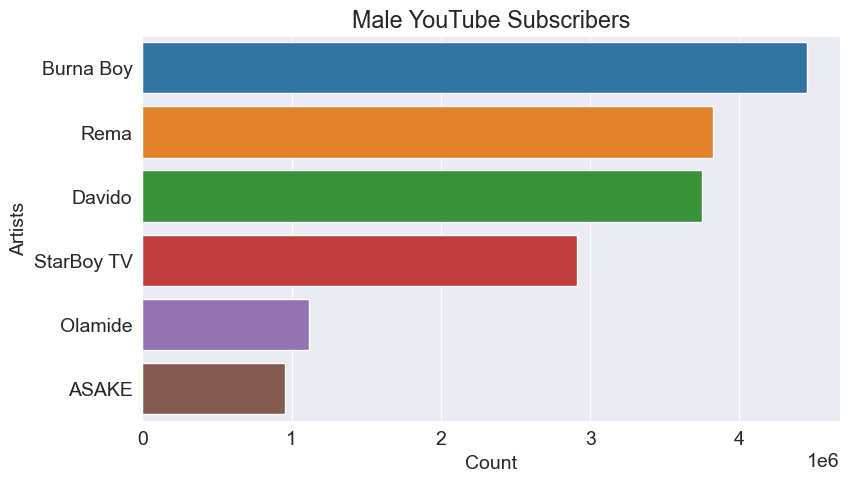

In [14]:
plt.title('Male YouTube Subscribers')
sns.barplot(x='Subscribers', y='Channel_name', data=male_subscribers)
plt.xlabel('Count')
plt.ylabel('Artists');

**Burna Boy have over 4.4 million youtube subscribers which makes him the male artist with highest youtube subscribers.**

### Which female artist  have the highest number of views?

**We'll also create a new data frame called `female_df` which will contain only female artists**

In [15]:
female_df = afrobeats_data[afrobeats_data.Gender == 'Female'].copy()
female_views = female_df[['Channel_name', 'Views']].sort_values(by='Views', ascending=False)
female_views

,Channel_name,Views
7,Yemi Alade,742939065
8,Tiwa Savage,489974586
9,Ayra Starr,451726660
1,Tems,286079572


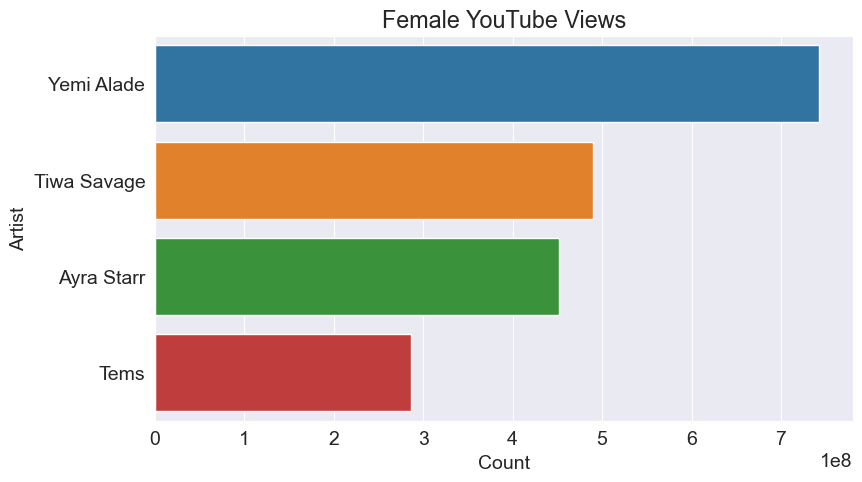

In [16]:
plt.title('Female YouTube Views')
sns.barplot(x='Views', y='Channel_name', data=female_views)
plt.xlabel('Count')
plt.ylabel('Artist');

**Yemi Alade is the female artist with the highest number of youtube views which is about 700 million views.**

## Inferences and Conclusions

**Here are some of inferences from the analysis:**
- **There is low representation of female in the dataset, this could be attributed to the selection bias when scrapping youtube for data. It could resolved by having equal number genders when getting the data.**
- **Yemi Alade youtube channel was created in 2012 which makes it the oldest youtube channel in the dataset.**
- **Burna Boy is the artist with the most subscribers, views and videos on youtube platform.**
- **Yemi Alade is the female artists with the most views on youtube platform.**

## References and Future Work

**Here some resources to get and learn about the dataset and tools used in this nootbook:**
- **Create a project on google developer console: https://console.cloud.google.com/cloud-resource-manager**
- **Enable YouTube API for YouTube Data APi v3: https://console.cloud.google.com/apis/library**
- **Create an API key: https://console.cloud.google.com/apis/credentials**
- **Google YouTube Data API Documentation: https://developers.google.com/youtube/v3/docs**
- **How to Find YouTube Channel ID for ANY YouTube Channel: https://www.youtube.com/watch?v=0oDy2sWPF38**
- **Google api client library for python docs: https://github.com/googleapis/google-api-python-client/blob/main/docs/README.md**
- **Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html**
- **Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html**
- **Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html**

**Here are some ideas for future analysis:**
- **Analyse the youtube videos of any artist and observe the videos with the highest likes, comments etc.**
- **Repeat this analysis with a different genre of music.**